In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
class Information():
    
    def __init__(self,data):
        data = pd.read_excel("data.xlsx")
        print(data.head())
        print(data.tail())
        
    def describe(self):
        print(data.describe().T)
       
    def info():
        print(data.info())
        print(data.len())
   
    def columns(self):
        print(data.columns)
        
    def num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))        
        
    def columnTypes():
        print(data.dtypes())
             
    def shape(self):
        print(data.shape)        
        
    def nullValues(self):
        print(self.data.isnull().values.any())
        print(self.data.isnull().sum())
        
    def count(self):
        print(self.data.count())
        
    
    def cat_data(self):
        print(self.data.select_dtypes(include=["object"]))

In [3]:
data= pd.read_excel("data.xlsx")

In [4]:
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
Information(data)

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [8]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def barplot(self,x,y,z = None):
        bar = sns.barplot(x = x, y = y, hue = z, data = self.data);
        return bar
    
    def catplot(self, x, y, z = None):
        cat = sns.catplot(x = x, y = y, hue = z, data = self.data);
        return cat
    
    def histogram(self,x, y = None):
        hist = sns.FacetGrid(self.data, hue = y, height = 5, xlim = (0, 10000)).map(sns.kdeplot, x, shade= True).add_legend();
        return hist
    
    def boxplot(self,x, y = None, z = None):
        box = sns.boxplot(x = x, y = y, hue = z, data=self.data);
        return box
    
    def jointplot(self,x,y):
        joint = sns.jointplot(x = x, y = y ,data = self.data, kind = "reg");
        return joint
    
    def scatter(self, x, y, z = None, s = None):
        sca = sns.scatterplot(x = x, y = y, hue=z, size = s, data = self.data);
        return sca
    
    def lmplot(self, x, y, z = None, c = None, r = None):
        lm = sns.lmplot(x = x, y = y, hue = z, col = c, row = r, data = self.data);
        return lm
    
    def pairplot(self, x = None):
        pair = sns.pairplot(self.data, kind = "reg", hue = x);
        return pair
    
    def heatmap(self):
        heat = sns.heatmap(self.data, annot = True, fmt = "d");
        return heat 
    
    def lineplot(self, x, y, z = None, s = None):
        lin = sns.lineplot(x = x, y = y, hue = z, style = s, markers = True,  dashes = False, data = self.data);
        return lin
    
    def countplot(self, column):
        count = sns.countplot(self.data.iloc[:,column], data = self.data, palette = "Set3");
        return count
    
    def cross_tab(self,x,y):
        cross = pd.crosstab(x, y)
        return cross

    def PieChart(self):
        pie = plt.pie(self.data, labels = self.data.index, counterclock = False, shadow = True)
        return pie
    
    def violin(self, x = None, y = None, z = None):
        vio = sns.catplot(x = x, y = y, hue = z, kind = "violin", data = self.data);
        return vio

In [10]:
data.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [11]:
data[['20_target','50_target','90_target']].describe().T

,count,mean,std,min,25%,50%,75%,max
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694
90_target,6167.0,-3.315072,36.841541,-38.573858,-37.695273,-35.788391,37.521892,38.465649


In [12]:
cor = data.corr()["50_target"].abs()
cor

ind_5        0.068989
ind_6        0.069652
ind_8        0.006984
ind_9        0.004053
ind_10       0.006654
               ...   
ind_426      0.009063
ind_428      0.052418
20_target    0.384076
50_target    1.000000
90_target    0.940916
Name: 50_target, Length: 133, dtype: float64

In [13]:
corr = cor.nlargest(10).index
corr

Index(['50_target', '90_target', '20_target', 'ind_412', 'ind_18', 'ind_17',
       'ind_324', 'ind_332', 'ind_16', 'ind_418'],
      dtype='object')

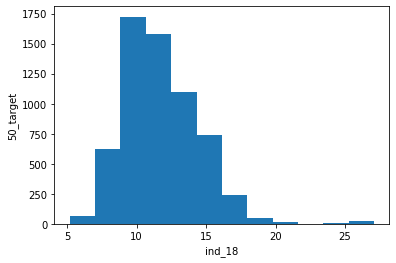

In [24]:
plt.hist(data.ind_18,bins=12,
         histtype="bar")

plt.xlabel("ind_18")
plt.ylabel("50_target")

plt.show()

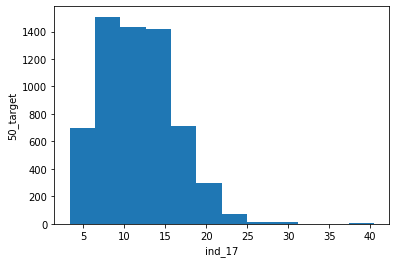

In [26]:
plt.hist(data.ind_17,bins=12,
         histtype="bar")

plt.xlabel("ind_17")
plt.ylabel("50_target")

plt.show()

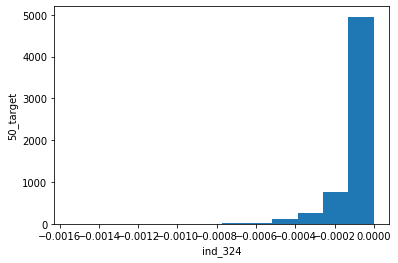

In [28]:
plt.hist(data.ind_324,bins=12,
         histtype="bar")

plt.xlabel("ind_324")
plt.ylabel("50_target")

plt.show()

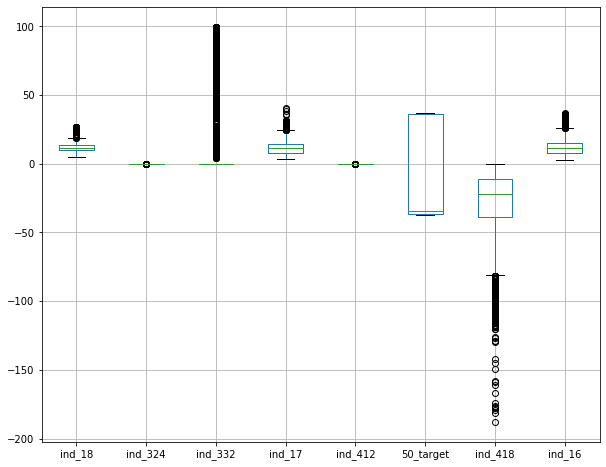

In [29]:
plt.figure(figsize=(10,8))
boxplot_data = data[["ind_18", "ind_324" , "ind_332","ind_17" , "ind_412" ,"50_target","ind_418","ind_16"]]
boxplot_data.boxplot()
plt.show()

In [30]:
new_data = data[['50_target', 'ind_412', 'ind_18', 'ind_17', 'ind_324', 'ind_332','ind_418','ind_16']]
new_data.corr()

,50_target,ind_412,ind_18,ind_17,ind_324,ind_332,ind_418,ind_16
50_target,1.000000,0.127234,0.127057,0.121097,-0.110802,0.104057,-0.101488,0.101774
ind_412,0.127234,1.000000,-0.018460,-0.036754,-0.263317,0.077782,-0.337149,-0.025170
ind_18,0.127057,-0.018460,1.000000,0.545873,-0.257567,0.160939,-0.359179,0.429029
ind_17,0.121097,-0.036754,0.545873,1.000000,-0.158633,0.064045,-0.416837,0.921295
ind_324,-0.110802,-0.263317,-0.257567,-0.158633,1.000000,-0.137205,0.400903,-0.093773
ind_332,0.104057,0.077782,0.160939,0.064045,-0.137205,1.000000,-0.152129,0.039247
ind_418,-0.101488,-0.337149,-0.359179,-0.416837,0.400903,-0.152129,1.000000,-0.362005
ind_16,0.101774,-0.025170,0.429029,0.921295,-0.093773,0.039247,-0.362005,1.000000


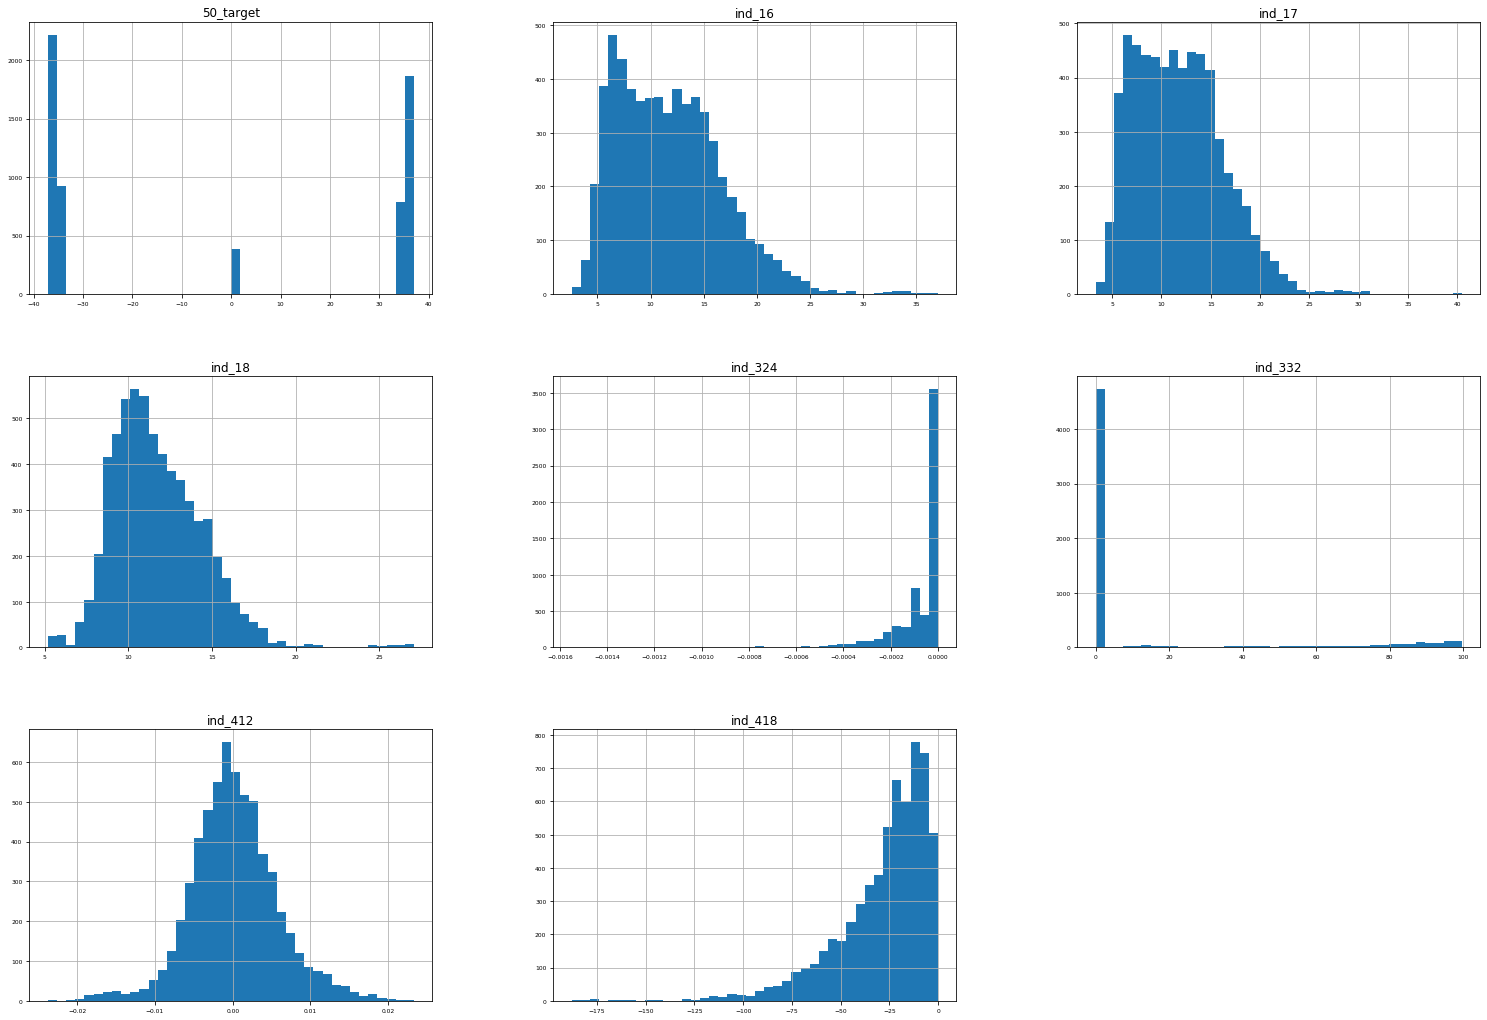

In [32]:
new_data.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

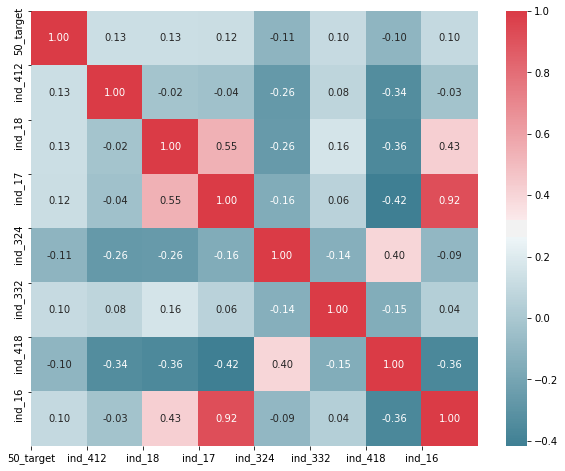

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = new_data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [34]:
class Statistic():  
    def __init__(self,data):
        data = pd.read_excel("data.xlsx")
        
    def shapiro(self, columnName):
        
        stats, p = shapiro(columnName)
        if p > alpha:
            print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
        else:
            print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')
            
    def spearmanr(self, col_1, col_2):
        stats.spearmanr(self.data[col_1],self.data[col_2])
        alpha=0.05
        if(p>alpha):
            print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarındaki bu ilişki anlamsızdır') 
        else:
            print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarında bir ilişki vardır ve bu ilişki anlamlıdır')
    
    def levene(self, columnName1, columnName2):
        levene, p = levene(columnName1, columnName2)
        print('Statistics=%.3f, p=%.3f' % (levene,p))
        if p > alpha:
            print('Varyanslar homojendir')
        else:
            print('Varyanslar homojen değildir')
            
    def wilcoxon(self, columnName1, columnName2):
        stat, p = stats.wilcoxon(columnName1, columnName2)
        print('Statistics=%.3f, p=%.3f' % (stat,p))

In [35]:
stat, p = stats.shapiro(data["ind_412"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.985, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [36]:
stat, p = stats.shapiro(data["50_target"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.692, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [39]:
#Varyansların eşit olup olmadığını anlamak için aşağıdaki yöntem kullanılır

In [40]:
stats.levene(data["50_target"], data["ind_412"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")


Statistics:0.692, p=0.000 
İki değişkenin varyansı birbirine eşit değildir. (reject H0)


In [42]:
stats.ttest_ind(data['50_target'],data['ind_412'],equal_var=True) 

#H0 : İki değişkenin ortalamaları arasında anlamlı bir fark vardır.(Fail to reject)
#H1 : İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.(Reject)

Ttest_indResult(statistic=-6.604632042359823, pvalue=4.148655478019836e-11)

In [49]:
for col in new_data.columns[1:]:
    if new_data[col].dtypes != object:
        
        stat, p = shapiro(new_data[col])

        print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p > alpha:
            print(col)
            print('\033[1m'+ col + '\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject) \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)\n')

Shapiro Statistics=0.985, p=0.000
ind_412: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.952, p=0.000
ind_18: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.962, p=0.000
ind_17: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.600, p=0.000
ind_324: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.537, p=0.000
ind_332: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.869, p=0.000
ind_418: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.954, p=0.000
ind_16: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)



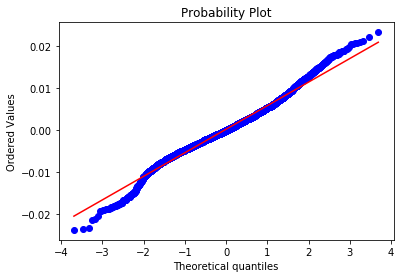

In [43]:
stats.probplot(new_data["ind_412"], dist = "norm", plot=pylab)
pylab.show()

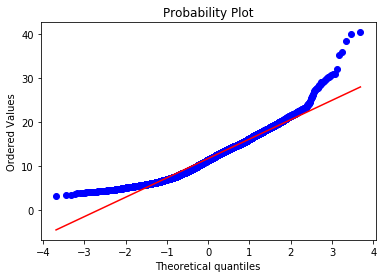

In [44]:
stats.probplot(new_data["ind_17"], dist = "norm", plot=pylab)
pylab.show()

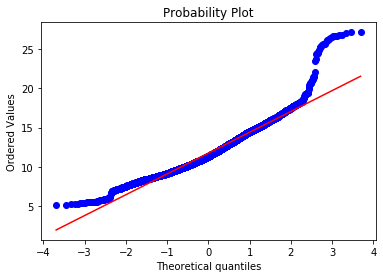

In [45]:
stats.probplot(new_data["ind_18"], dist = "norm", plot=pylab)
pylab.show()

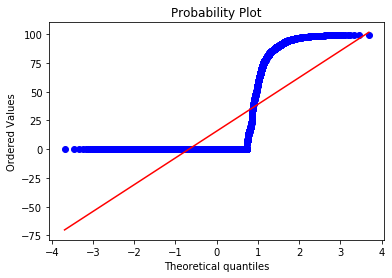

In [46]:
stats.probplot(new_data["ind_332"], dist = "norm", plot=pylab)
pylab.show()

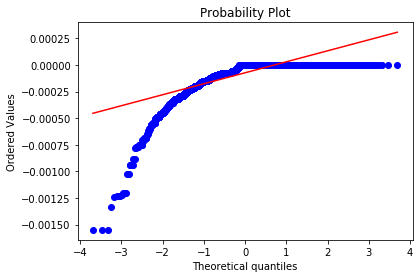

In [47]:
stats.probplot(new_data["ind_324"], dist = "norm", plot=pylab)
pylab.show()

In [ ]:
### Linear Regression

In [50]:
data= pd.read_excel("data.xlsx")

In [51]:
X= data[["ind_412","ind_18","ind_17","ind_324","ind_332","ind_418","ind_16"]]    # bağımlı değişken
X[0:5]

,ind_412,ind_18,ind_17,ind_324,ind_332,ind_418,ind_16
0,0.002371,9.1100,12.060000,-0.000062,20.967742,-54,11.73
1,0.003074,9.2225,11.326667,-0.000062,20.800000,-60,12.22
2,0.003561,9.3125,10.973333,-0.000062,20.634921,-60,12.28
3,0.004366,9.4150,10.426667,-0.000062,20.472441,-65,12.61
4,0.004198,9.8925,11.406667,-0.000062,20.312500,-86,14.25


In [52]:
X=sm.add_constant(X)

In [54]:
y=data[["50_target"]] 
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [55]:
lm=sm.OLS(y,X)    
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     41.75
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           6.97e-58
Time:                        18:11:26   Log-Likelihood:                -30455.
No. Observations:                6167   AIC:                         6.093e+04
Df Residuals:                    6159   BIC:                         6.098e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0384      1.969    -11.192      0.000     -25.899     -18.178
ind_412      760.3794     84.029      9.049      0.000     595.653     925.106
ind_18         0.8350      0.201      4.149      0.000       0.441       1.230
ind_17         0.8312      0.278      2.994      0.003       0.287       1.376
ind_324    -1.265e+04   3643.516     -3.473      0.001   -1.98e+04   -5512.106
ind_332        0.0827      0.014      5.971      0.000       0.056       0.110
ind_418        0.0499      0.023      2.131      0.033       0.004       0.096
ind_16        -0.1253      0.230     -0.545      0.586      -0.576       0.325
==============================================================================
Omnibus:                    26083.064   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.561
Skew:                           0.131   Prob(JB):                    3.54e-172
Kurtosis:                       1.267   Cond. No.                     3.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-22.0384,1.969,-11.192,0.000,-25.899,-18.178
ind_412,760.3794,84.029,9.049,0.000,595.653,925.106
ind_18,0.8350,0.201,4.149,0.000,0.441,1.230
ind_17,0.8312,0.278,2.994,0.003,0.287,1.376
ind_324,-1.265e+04,3643.516,-3.473,0.001,-1.98e+04,-5512.106
ind_332,0.0827,0.014,5.971,0.000,0.056,0.110
ind_418,0.0499,0.023,2.131,0.033,0.004,0.096
ind_16,-0.1253,0.230,-0.545,0.586,-0.576,0.325


In [57]:
model.f_pvalue

6.970686972837003e-58

In [58]:
model.conf_int()

,0,1
const,-25.898562,-18.178221
ind_412,595.653007,925.105854
ind_18,0.440511,1.229546
ind_17,0.286876,1.375514
ind_324,-19797.234248,-5512.105891
ind_332,0.055555,0.109866
ind_418,0.003994,0.095771
ind_16,-0.575981,0.325433


In [59]:
model.fittedvalues[0:5]

0   -4.250667
1   -4.606307
2   -4.475751
3   -4.536794
4   -4.717559
dtype: float64

In [60]:
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [61]:
X['ind_412'][0:5]

0    0.002371
1    0.003074
2    0.003561
3    0.004366
4    0.004198
Name: ind_412, dtype: float64

In [62]:
y_predicted=[]
for i in range(len(y)):
    y_predicted.append(X['ind_412'][i]*float(model.params[1])+float(model.params[0]))

In [63]:
y_predicted[0:5]

[-20.23519358806225,
 -19.7006795446113,
 -19.330416582739918,
 -18.718473101863054,
 -18.846327861613798]

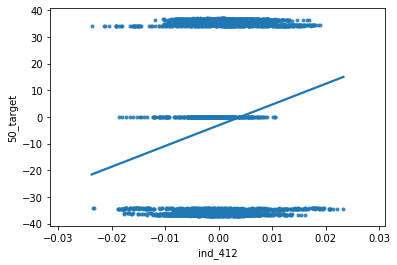

In [69]:
g = sns.regplot(data['ind_412'],data['50_target'], ci=None, scatter_kws={'s':9})
g.set_ylabel('50_target')
g.set_xlabel('ind_412')
fig = g.get_figure()
fig.savefig("output.png")

In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
X = data[['ind_412']]
y= data['50_target']

In [73]:
reg = LinearRegression()
model= reg.fit(X,y)

In [74]:
model.intercept_

-3.0802611305832257

In [75]:
model.coef_[0]

776.9121351827604

In [76]:
model.score(X,y)

0.016188589237305262

In [77]:
prediction=model.predict(X)
prediction[0:10]

array([-1.23785673, -0.69172091, -0.31340743,  0.31184136,  0.18120669,
        1.11100659,  1.38596356,  0.8907419 ,  0.13230473,  0.10143568])

In [78]:
error_df=prediction-y

In [79]:
error_arr=error_df.values

In [80]:
error_df.var()

1175.0429350508957

In [81]:
error_df.abs().mean()

33.103797261077915

# PCA

In [85]:
col=data.columns

num_cols=data._get_numeric_data().columns
cat=set(col)-set(num_cols)
cat

{'ind_109', 'ind_420', 'ind_422'}

In [87]:
data['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [88]:
data["ind_109"].value_counts()

GREEN    3132
RED      3035
Name: ind_109, dtype: int64

In [90]:
cat = data.select_dtypes(include='object')
cat 

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388
...,...,...,...
6162,RED,-11,-270
6163,RED,-12,-271
6164,GREEN,-21,-280
6165,GREEN,-33,-292


In [91]:
dms = pd.get_dummies(data[["ind_109", "ind_420", "ind_422"]])
dms.head()
y=data["50_target"]
X=data.drop(["50_target","ind_109","ind_420","ind_422"], axis=1 ).astype("float64")
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,90_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,15.135802,36.997753
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,15.143348,37.016198
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,15.146870,-37.024805
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,15.153283,-37.040483
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,-15.179065,-37.103503


In [93]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
training = data.copy()
print("training", training.shape)

X_train (4625, 132)
X_test (1542, 132)
y_train (4625,)
y_test (1542,)
training (6167, 136)


In [98]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import numpy as np
import pandas as pd

In [99]:
pca=PCA()

In [100]:
X_reduced_train= pca.fit_transform(scale(X_train))

In [101]:
X_reduced_train[0:1,:]

array([[ 8.79626641e+00, -4.62676518e+00,  1.91708278e+00,
         1.76389744e+00, -2.02407919e+00,  1.48552538e+00,
        -1.10521199e+00, -2.92624800e-01, -1.85347061e+00,
        -6.52226813e-01,  3.94248103e-01, -8.29372773e-02,
         1.08132641e+00, -5.90856600e-01, -1.21767775e+00,
        -5.15590053e-01,  4.74364167e-01,  1.42239938e+00,
         1.84514920e+00,  2.73418206e-02, -9.91145659e-01,
        -3.31269000e-01,  1.50996100e+00, -3.54308803e-01,
        -2.88083979e-01,  1.55322754e+00, -1.25646993e-01,
         5.85675498e-01, -5.75690235e-01, -1.12161958e+00,
        -4.00016140e-01, -8.51981918e-01,  1.09466688e-01,
        -4.14899781e-01,  1.83723497e-01, -7.96668355e-01,
         4.56531509e-01, -4.09048716e-01,  1.04056432e+00,
        -1.13685484e+00, -5.08330549e-02, -2.37693338e-01,
         1.04073833e+00,  3.31588736e-01,  1.28599489e-01,
         5.88746162e-01, -3.81382403e-01, -3.25292607e-02,
         1.01160811e+00, -2.19836382e-01, -6.14058886e-0

In [102]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([36.6 , 48.64, 54.73, 59.14, 62.26, 65.24, 67.92, 69.94, 71.65,
       73.3 , 74.84, 76.24, 77.61, 78.87, 80.04, 81.17, 82.17, 83.14,
       84.05, 84.89, 85.67, 86.43, 87.12, 87.8 , 88.42, 89.03, 89.6 ,
       90.15, 90.68, 91.14, 91.59, 92.04, 92.46, 92.85, 93.22, 93.58,
       93.91, 94.23, 94.53, 94.82, 95.1 , 95.37, 95.61, 95.84, 96.06,
       96.28, 96.49, 96.68, 96.87, 97.04, 97.2 , 97.35, 97.49, 97.63,
       97.76, 97.89, 98.01, 98.12, 98.22, 98.31, 98.4 , 98.49, 98.58,
       98.66, 98.74, 98.82, 98.89, 98.96, 99.02, 99.08, 99.14, 99.19,
       99.24, 99.29, 99.34, 99.38, 99.42, 99.46, 99.5 , 99.53, 99.56,
       99.59, 99.62, 99.65, 99.68, 99.71, 99.73, 99.75, 99.77, 99.79,
       99.81, 99.83, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91,
       99.92, 99.93, 99.94, 99.95, 99.96, 99.97, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98,

In [103]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([36.6 , 48.64, 54.73, 59.14, 62.26])

In [104]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[120:]

array([99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98])

In [112]:
pca = PCA(n_components = 5)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)

In [113]:
pcr_model.intercept_

-2.9118414689189187

In [114]:
pcr_model.coef_ 

array([-0.34324984,  0.45037773,  1.01401875,  1.33118816, -0.82340316])

In [115]:
y_pred = pcr_model.predict(X_reduced_train) 
y_pred[0:5]

array([-2.05695989, -5.92143168, -9.08939466, -8.14841836, -8.01419549])

In [116]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

34.12659867068147

In [118]:
r2_score(y_train,y_pred)

0.0253408650251854

In [119]:
data["50_target"].mean()

-2.9063582899740608

In [120]:
pca2 = PCA(n_components=5)

X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)

np.sqrt(mean_squared_error(y_test,y_pred))

34.145848123702386

In [121]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:120] ,y_train)
pcr_model.intercept_
pcr_model.coef_

array([-0.34324984,  0.45037773,  1.01401875,  1.33118816, -0.82340316])

In [122]:
y_pred = pcr_model.predict(X_reduced_train[:,0:120])
print(np.sqrt(mean_squared_error(y_train,y_pred)))

34.12659867068147


## Model Tuning

In [123]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)

y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

34.145848123702386


In [124]:
from sklearn import model_selection

In [125]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [126]:
RMSE = []

In [127]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

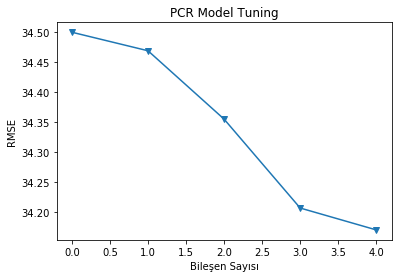

In [128]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

In [129]:
lm = LinearRegression()

In [130]:
pcr_model = lm.fit(X_reduced_train[:,0:3], y_train)

In [131]:
y_pred = pcr_model.predict(X_reduced_train[:,0:3])

In [132]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

34.317961229029216
